# 6. File Systems & Exceptions
### Compiled by :
      Alem H Fitwi, 
      PhD Student, ECE (Privacy, ML/DNN, & Chaotic Encryption)
      GA-Data Analystics Specialist,
      Binghamton University-State University of New York
      Since August, 2017     


<div class="alert alert-block alert-warning">

### 6.0 CMDs
- I can not give any command at all, every time I tried I got a message:
    - The command could not be located because '/usr/bin' is not included in the PATH environment variable.
- What does your /etc/environment file look like? Mine looks like this:
    - PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games"
    - export PATH
- If the content of the file looks OK, what about the premissions?:
    - \$ ls -l /etc/environment
    - -rw-r--r-- 1 root root 79 2010-03-16 14:44 /etc/environment
    - alem@alem-HP-Pavilion-x360-Convertible:~$  ls -l /etc/environment
-rw-r--r-- 1 root root 106 Sep  4 19:07 /etc/environment


<div class="alert alert-block alert-warning">

### 6.1 Reading and Writing Files
- File is a named location on disk to store related information. It is used to permanently store data in a non-volatile memory (e.g. hard disk).

- Since, random access memory (RAM) is volatile which loses its data when computer is turned off, we use files for future use of the data.

- When we want to read from or write to a file we need to open it first. When we are done, it needs to be closed, so that resources that are tied with the file are freed. Hence, in Python, a file operation takes place in the following order.
            Open a file:
            Read or write (perform operation)
            Close the file

##### How to open a file?
Python has a built-in function open() to open a file. This function returns a file object, also called a handle, as it is used to read or modify the file accordingly.


In [3]:
f = open("./0_Datasets/text.txt")    
# open file in current directory -- relative path
f # file object

<_io.TextIOWrapper name='./0_Datasets/text.txt' mode='r' encoding='UTF-8'>

In [4]:
f = open("/home/alem/Desktop/FinalNotes/1_Python/0_Datasets/text.txt")  
# specifying full path -- absolute path
f #object

<_io.TextIOWrapper name='/home/alem/Desktop/FinalNotes/1_Python/0_Datasets/text.txt' mode='r' encoding='UTF-8'>

- We can specify the mode while opening a file. In mode, we specify whether we want to read 'r', write 'w' or append 'a' to the file. We also specify if we want to open the file in text mode or binary mode.
- The default is reading in text mode. In this mode, we get strings when reading from the file.
- On the other hand, binary mode returns bytes and this is the mode to be used when dealing with non-text files like image or exe files.

##### Python File Modes 
 Mode 	Description
* 'r' 	Open a file for reading. (default)
* 'w' 	Open a file for writing. Creates a new file if it does not exist or truncates the file if it exists.
* 'x' 	Open a file for exclusive creation. If the file already exists, the operation fails.
* 'a' 	Open for appending at the end of the file without truncating it. Creates a new file if it does not exist.
* 't' 	Open in text mode. (default)
* 'b' 	Open in binary mode.
* '+' 	Open a file for updating (reading and writing)

In [ ]:
f = open("./0_Datasets/text.txt")      # equivalent to 'r' or 'rt'
f = open("test.txt",'w')  # write in text mode
f = open("img.bmp",'r+b') # read and write in binary mode

- Unlike other languages, the character 'a' does not imply the number 97 until it is encoded using ASCII (or other equivalent encodings).
- Moreover, the default encoding is platform dependent. In windows, it is 'cp1252' but 'utf-8' in Linux.
- So, we must not also rely on the default encoding or else our code will behave differently in different platforms.
- Hence, when working with files in text mode, it is highly recommended to specify the encoding type.   

In [6]:
f = open("./0_Datasets/text.txt",mode = 'r',encoding = 'utf-8')
f

<_io.TextIOWrapper name='./0_Datasets/text.txt' mode='r' encoding='utf-8'>

##### How to close a file Using Python?
- When we are done with operations to the file, we need to properly close the file.
- Closing a file will free up the resources that were tied with the file and is done using Python close() method.
- Python has a garbage collector to clean up unreferenced objects but, we must not rely on it to close the file.

In [8]:
f = open("./0_Datasets/text.txt",encoding = 'utf-8')
# perform file operations
f.close()

- This method is not entirely safe. If an exception occurs when we are performing some operation with the file, the code exits without closing the file.
- A safer way is to use a try...finally block.    

In [9]:
try:
    f = open("./0_Datasets/text.txt",encoding = 'utf-8')
    # perform file operations
finally:
    f.close()

- This way, we are guaranteed that the file is properly closed even if an exception is raised, causing program flow to stop.
- The best way to do this is using the with statement. This ensures that the file is closed when the block inside with is exited.
- We don't need to explicitly call the close() method. It is done internally.

In [10]:
with open("./0_Datasets/text.txt",encoding = 'utf-8') as f:
       # perform file operations

SyntaxError: unexpected EOF while parsing (<ipython-input-10-dbdfe0949e25>, line 2)

##### How to write to File Using Python?
- In order to write into a file in Python, we need to open it in write 'w', append 'a' or exclusive creation 'x' mode.
- We need to be careful with the 'w' mode as it will overwrite into the file if it already exists. All previous data are erased.
- Writing a string or sequence of bytes (for binary files) is done using write() method. This method returns the number of characters written to the file.   

In [11]:
with open("./0_Datasets/test.txt",'w',encoding = 'utf-8') as f:
    f.write("my first file\n")
    f.write("This file\n\n")
    f.write("contains three lines\n")

- This program will create a new file named 'test.txt' if it does not exist. If it does exist, it is overwritten.
- We must include the newline characters ourselves to distinguish different lines.

##### How to read files in Python?
- To read a file in Python, we must open the file in reading mode.
- There are various methods available for this purpose. We can use the read(size) method to read in size number of data. If size parameter is not specified, it reads and returns up to the end of the file.  

In [17]:
f = open("0_Datasets/test.txt",'r',encoding = 'utf-8')
f.read(4)    # read the first 4 data    
f.read(4)    # read the next 4 data    
f.read()     # read in the rest till end of file    
f.read()  # further reading returns empty sting

''

In [13]:
f = open("0_Datasets/test.txt",'r',encoding = 'utf-8')
f.read(4)    # read the first 4 data    

'my f'

In [14]:
f.read(4)    # read the next 4 data   

'irst'

In [15]:
f.read()     # read in the rest till end of file 

' file\nThis file\n\ncontains three lines\n'

In [16]:
f.read()  # further reading returns empty sting

''

- We can see that, the read() method returns newline as '\n'. Once the end of file is reached, we get empty string on further reading.
- We can change our current file cursor (position) using the seek() method. Similarly, the tell() method returns our current position (in number of bytes).    

In [18]:
f.tell()    # get the current file position    
f.seek(0)   # bring file cursor to initial position    
print(f.read())  # read the entire file    

my first file
This file

contains three lines



We can read a file line-by-line using a for loop. This is both efficient and fast.

In [20]:
for line in f:
    print(line, end = '')

- The lines in file itself has a newline character '\n'.
- Moreover, the print() end parameter to avoid two newlines when printing.
- Alternately, we can use readline() method to read individual lines of a file. This method reads a file till the newline, including the newline character.

In [21]:
f.readline()
f.readline()
f.readline()
f.readline()  

''

Lastly, the readlines() method returns a list of remaining lines of the entire file. All these reading method return empty values when end of file (EOF) is reached.

    

In [22]:
f.readlines() 

[]

##### Python File Methods

There are various methods available with the file object. Some of them have been used in above examples.Here is the complete list of methods in text mode with a brief description.

Python File Methods Method 	Description

close() 	Close an open file. It has no effect if the file is already closed.

detach() 	Separate the underlying binary buffer from the TextIOBase and return it.

fileno() 	Return an integer number (file descriptor) of the file.

flush() 	Flush the write buffer of the file stream.

isatty() 	Return True if the file stream is interactive.

read(n) 	Read atmost n characters form the file. Reads till end of file if it is negative or None.

readable() 	Returns True if the file stream can be read from.

readline(n=-1) 	Read and return one line from the file. Reads in at most n bytes if specified.

readlines(n=-1) 	Read and return a list of lines from the file. Reads in at most n bytes/characters if specified.

seek(offset,from=SEEK_SET) 	Change the file position to offset bytes, in reference to from (start, current, end).

seekable() 	Returns True if the file stream supports random access.

tell() 	Returns the current file location.

truncate(size=None) 	Resize the file stream to size bytes. If size is not specified, resize to current location.

writable() 	Returns True if the file stream can be written to.

write(s) 	Write string s to the file and return the number of characters written.

writelines(lines) 	Write a list of lines to the file.

<div class="alert alert-block alert-warning">

### 6.2 Python Directory

##### What is Directory in Python?
- If there are a large number of files to handle in your Python program, you can arrange your code within different directories to make things more manageable.
- A directory or folder is a collection of files and sub directories. Python has the os module, which provides us with many useful methods to work with directories (and files as well).

##### Get Current Directory
- We can get the present working directory using the getcwd() method.
- This method returns the current working directory in the form of a string. We can also use the getcwdb() method to get it as bytes object.

In [33]:
import os
os.getcwd() 

'/home/alem/Desktop/FinalNotes/1_Python'

In [34]:
os.getcwdb()

b'/home/alem/Desktop/FinalNotes/1_Python'

The extra backslash implies escape sequence. The print() function will render this properly.

In [24]:
print(os.getcwd()) # C:\Program Files\PyScripter

/home/alem/Desktop/FinalNotes/1_Python


In [25]:
os.getcwd()

'/home/alem/Desktop/FinalNotes/1_Python'

##### Changing Directory
- We can change the current working directory using the chdir() method.
- The new path that we want to change to must be supplied as a string to this method. We can use both forward slash (/) or the backward slash (\) to separate path elements.
- It is safer to use escape sequence when using the backward slash.

In [26]:
os.chdir('/home/alem/Desktop/FinalNotes/1_Python')
print(os.getcwd())

/home/alem/Desktop/FinalNotes/1_Python


##### List Directories and Files
- All files and sub directories inside a directory can be known using the listdir() method.
- This method takes in a path and returns a list of sub directories and files in that path. If no path is specified, it returns from the current working directory.  

In [27]:
print(os.getcwd())
os.listdir()
#os.listdir('C:\\') 

/home/alem/Desktop/FinalNotes/1_Python


['14_Statistics.ipynb',
 'py2',
 '__pycache__',
 '10_QuestionsAnswers.ipynb',
 '6_FileSystems.ipynb',
 'py4DS_1',
 '1_Complete-Python-3-Bootcamp-master',
 '9_ErrorsandExceptions.ipynb',
 '1_Introduction.ipynb',
 '15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 '0_PCAP',
 '11_AbstractStaticInterfaceClasses.ipynb',
 '0_Datasets',
 '10_DecoratorsandGenerators.ipynb',
 '4_pyNotes',
 '2_ObjectsAndDataStructures.ipynb',
 '17_PythonDateandTime.ipynb',
 '12_NumpyandArrays.ipynb',
 '5_MethodsandFunctions.ipynb',
 '.ipynb_checkpoints',
 '7_Python_OOP.ipynb',
 '4_FlowControls.ipynb',
 '16_PythonDateandTime.ipynb',
 'config.py',
 '8_PackagesandModules.ipynb',
 'pynotes',
 '13_Pandas.ipynb',
 '3_PythonOperators.ipynb',
 '18_DashandPlotly.ipynb',
 '2_Introduction.ipynb',
 '0_figs']

##### Making a New Directory
- We can make a new directory using the mkdir() method.
- This method takes in the path of the new directory. If the full path is not specified, the new directory is created in the current working directory.   

In [28]:
os.mkdir('Test')
os.listdir()

['14_Statistics.ipynb',
 'py2',
 '__pycache__',
 '10_QuestionsAnswers.ipynb',
 '6_FileSystems.ipynb',
 'py4DS_1',
 '1_Complete-Python-3-Bootcamp-master',
 '9_ErrorsandExceptions.ipynb',
 '1_Introduction.ipynb',
 '15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 'Test',
 '0_PCAP',
 '11_AbstractStaticInterfaceClasses.ipynb',
 '0_Datasets',
 '10_DecoratorsandGenerators.ipynb',
 '4_pyNotes',
 '2_ObjectsAndDataStructures.ipynb',
 '17_PythonDateandTime.ipynb',
 '12_NumpyandArrays.ipynb',
 '5_MethodsandFunctions.ipynb',
 '.ipynb_checkpoints',
 '7_Python_OOP.ipynb',
 '4_FlowControls.ipynb',
 '16_PythonDateandTime.ipynb',
 'config.py',
 '8_PackagesandModules.ipynb',
 'pynotes',
 '13_Pandas.ipynb',
 '3_PythonOperators.ipynb',
 '18_DashandPlotly.ipynb',
 '2_Introduction.ipynb',
 '0_figs']

 ##### Renaming a Directory or a File
- The rename() method can rename a directory or a file.
- The first argument is the old name and the new name must be supplies as the second argument.  

In [29]:
os.rename('Test','new_one')
os.listdir()  

['14_Statistics.ipynb',
 'py2',
 '__pycache__',
 '10_QuestionsAnswers.ipynb',
 '6_FileSystems.ipynb',
 'py4DS_1',
 '1_Complete-Python-3-Bootcamp-master',
 '9_ErrorsandExceptions.ipynb',
 '1_Introduction.ipynb',
 '15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 '0_PCAP',
 '11_AbstractStaticInterfaceClasses.ipynb',
 '0_Datasets',
 '10_DecoratorsandGenerators.ipynb',
 '4_pyNotes',
 '2_ObjectsAndDataStructures.ipynb',
 '17_PythonDateandTime.ipynb',
 '12_NumpyandArrays.ipynb',
 '5_MethodsandFunctions.ipynb',
 '.ipynb_checkpoints',
 '7_Python_OOP.ipynb',
 '4_FlowControls.ipynb',
 '16_PythonDateandTime.ipynb',
 'config.py',
 'new_one',
 '8_PackagesandModules.ipynb',
 'pynotes',
 '13_Pandas.ipynb',
 '3_PythonOperators.ipynb',
 '18_DashandPlotly.ipynb',
 '2_Introduction.ipynb',
 '0_figs']

##### Removing Directory or File
- A file can be removed (deleted) using the remove() method.
- Similarly, the rmdir() method removes an empty directory.    

In [31]:
os.remove('./0_Datasets/text.txt')
os.rmdir('new_one')
os.listdir()

['14_Statistics.ipynb',
 'py2',
 '__pycache__',
 '10_QuestionsAnswers.ipynb',
 '6_FileSystems.ipynb',
 'py4DS_1',
 '1_Complete-Python-3-Bootcamp-master',
 '9_ErrorsandExceptions.ipynb',
 '1_Introduction.ipynb',
 '15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 '0_PCAP',
 '11_AbstractStaticInterfaceClasses.ipynb',
 '0_Datasets',
 '10_DecoratorsandGenerators.ipynb',
 '4_pyNotes',
 '2_ObjectsAndDataStructures.ipynb',
 '17_PythonDateandTime.ipynb',
 '12_NumpyandArrays.ipynb',
 '5_MethodsandFunctions.ipynb',
 '.ipynb_checkpoints',
 '7_Python_OOP.ipynb',
 '4_FlowControls.ipynb',
 '16_PythonDateandTime.ipynb',
 'config.py',
 '8_PackagesandModules.ipynb',
 'pynotes',
 '13_Pandas.ipynb',
 '3_PythonOperators.ipynb',
 '18_DashandPlotly.ipynb',
 '2_Introduction.ipynb',
 '0_figs']

- However, note that rmdir() method can only remove empty directories.
- In order to remove a non-empty directory we can use the rmtree() method inside the shutil module.  

In [38]:
os.getcwd()

'/home/alem/Desktop/FinalNotes/1_Python/Test'

In [39]:
os.chdir('/home/alem/Desktop/FinalNotes/1_Python')
os.getcwd()

'/home/alem/Desktop/FinalNotes/1_Python'

In [40]:
import shutil
shutil.rmtree('Test')
os.listdir()   

['14_Statistics.ipynb',
 'py2',
 '__pycache__',
 '10_QuestionsAnswers.ipynb',
 '6_FileSystems.ipynb',
 'py4DS_1',
 '1_Complete-Python-3-Bootcamp-master',
 '9_ErrorsandExceptions.ipynb',
 '1_Introduction.ipynb',
 '15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 '0_PCAP',
 '11_AbstractStaticInterfaceClasses.ipynb',
 '0_Datasets',
 '10_DecoratorsandGenerators.ipynb',
 '4_pyNotes',
 '2_ObjectsAndDataStructures.ipynb',
 '17_PythonDateandTime.ipynb',
 '12_NumpyandArrays.ipynb',
 '5_MethodsandFunctions.ipynb',
 '.ipynb_checkpoints',
 '7_Python_OOP.ipynb',
 '4_FlowControls.ipynb',
 '16_PythonDateandTime.ipynb',
 'config.py',
 '8_PackagesandModules.ipynb',
 'pynotes',
 '13_Pandas.ipynb',
 '3_PythonOperators.ipynb',
 '18_DashandPlotly.ipynb',
 '2_Introduction.ipynb',
 '0_figs']

##### Copy file 

In [42]:
# Copy file from one location to another using shutil
shutil.copy("./0_figs/allany.png","./0_Datasets/")

'./0_Datasets/allany.png'

##### glob
- A file pattern matching
- In Python, the glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules. 
- It is also predicted that according to benchmarks it is faster than other methods to match pathnames in directories. 
- With glob, we can also use wildcards ("*, ?, [ranges]) apart from exact string search to make path retrieval more simple and convenient.

In [63]:
import glob
glob.glob('./*.*')

['./14_Statistics.ipynb',
 './10_QuestionsAnswers.ipynb',
 './6_FileSystems.ipynb',
 './9_ErrorsandExceptions.ipynb',
 './1_Introduction.ipynb',
 './15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 './11_AbstractStaticInterfaceClasses.ipynb',
 './10_DecoratorsandGenerators.ipynb',
 './2_ObjectsAndDataStructures.ipynb',
 './17_PythonDateandTime.ipynb',
 './12_NumpyandArrays.ipynb',
 './5_MethodsandFunctions.ipynb',
 './7_Python_OOP.ipynb',
 './4_FlowControls.ipynb',
 './16_PythonDateandTime.ipynb',
 './config.py',
 './8_PackagesandModules.ipynb',
 './13_Pandas.ipynb',
 './3_PythonOperators.ipynb',
 './18_DashandPlotly.ipynb',
 './2_Introduction.ipynb']

In [64]:
# Python program to demonstrate 
# glob using different wildcards 


import glob 


print('Named explicitly:') 
for name in glob.glob('/home/geeks/Desktop/gfg/data.txt'): 
    print(name) 

# Using '*' pattern 
print('\nNamed with wildcard *:') 
for name in glob.glob('/home/geeks/Desktop/gfg/*'): 
    print(name) 

# Using '?' pattern 
print('\nNamed with wildcard ?:') 
for name in glob.glob('/home/geeks/Desktop/gfg/data?.txt'): 
    print(name) 

# Using [0-9] pattern 
print('\nNamed with wildcard ranges:') 
for name in glob.glob('/home/geeks/Desktop/gfg/*[0-9].*'): 
    print(name) 

Named explicitly:

Named with wildcard *:

Named with wildcard ?:

Named with wildcard ranges:


<div class="alert alert-block alert-warning">

### 6.3 Python Errors and Exceptions

When writing a program, we, more often than not, will encounter errors. Error caused by not following the proper structure (syntax) of the language is called syntax error or parsing error. 

In [43]:
if 5>7

SyntaxError: invalid syntax (<ipython-input-43-9ebc5408a330>, line 1)

- We can notice here that a colon is missing in the if statement. 
- Errors can also occur at runtime and these are called exceptions. They occur, for example, when a file we try to open does not exist (FileNotFoundError), dividing a number by zero (ZeroDivisionError), module we try to import is not found (ImportError) etc.
- Whenever these type of runtime error occur, Python creates an exception object. If not handled properly, it prints a traceback to that error along with some details about why that error occurred.

In [44]:
1 / 0

ZeroDivisionError: division by zero

In [45]:
open('alem.txt') # no such file

FileNotFoundError: [Errno 2] No such file or directory: 'alem.txt'

##### Python Built-in Exceptions

Illegal operations can raise exceptions. There are plenty of built-in exceptions in Python that are raised when corresponding errors occur. We can view all the built-in exceptions using the local() built-in functions as follows.


In [46]:
locals()['__builtins__']

<module 'builtins' (built-in)>

This will return us a dictionary of built-in exceptions, functions and attributes. Some of the common built-in exceptions in Python programming along with the errors that cause them are tabulated below.

Python Built-in Exceptions Exception 	Cause of Error
<ul>
<li>AssertionError 	Raised when assert statement fails.</li>
<li>AttributeError 	Raised when attribute assignment or reference fails.</li>
<li>EOFError 	Raised when the input() functions hits end-of-file condition.</li>
<li>FloatingPointError 	Raised when a floating point operation fails.</li>
<li>GeneratorExit 	Raise when a generator's close() method is called.</li>
<li>ImportError 	Raised when the imported module is not found.</li>
<li>IndexError 	Raised when index of a sequence is out of range.</li>
<li>KeyError 	Raised when a key is not found in a dictionary.</li>
<li>KeyboardInterrupt 	Raised when the user hits interrupt key (Ctrl+c or delete).</li>
<li>MemoryError 	Raised when an operation runs out of memory.</li>
<li>NameError 	Raised when a variable is not found in local or global scope.</li>
<li>NotImplementedError 	Raised by abstract methods.</li>
<li>OSError 	Raised when system operation causes system related error.</li>
<li>OverflowError 	Raised when result of an arithmetic operation is too large to be represented.</li>
<li>ReferenceError 	Raised when a weak reference proxy is used to access a garbage collected referent.</li>
<li>RuntimeError 	Raised when an error does not fall under any other category.</li>
<li>StopIteration 	Raised by next() function to indicate that there is no further item to be returned by iterator.</li>
<li>SyntaxError 	Raised by parser when syntax error is encountered.</li>
<li>IndentationError 	Raised when there is incorrect indentation.</li>
<li>TabError 	Raised when indentation consists of inconsistent tabs and spaces.</li>
<li>SystemError 	Raised when interpreter detects internal error.</li>
<li>SystemExit 	Raised by sys.exit() function.</li>
<li>TypeError 	Raised when a function or operation is applied to an object of incorrect type.</li>
<li>UnboundLocalError 	Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable.</li>
<li>UnicodeError 	Raised when a Unicode-related encoding or decoding error occurs.</li>
<li>UnicodeEncodeError 	Raised when a Unicode-related error occurs during encoding.</li>
<li>UnicodeDecodeError 	Raised when a Unicode-related error occurs during decoding.</li>
<li>UnicodeTranslateError 	Raised when a Unicode-related error occurs during translating.</li>
<li>ValueError 	Raised when a function gets argument of correct type but improper value.</li>
<li>ZeroDivisionError 	Raised when second operand of division or modulo operation is zero.</li>
</ul>

We can also define our own exception in Python (if required). Visit this page to learn more about user-defined exceptions. We can handle these built-in and user-defined exceptions in Python using try, except and finally statements. 

##### Exception Handling

##### What are exceptions in Python?
- Python has many built-in exceptions which forces your program to output an error when something in it goes wrong.
- When these exceptions occur, it causes the current process to stop and passes it to the calling process until it is handled. If not handled, our program will crash.
- For example, if function A calls function B which in turn calls function C and an exception occurs in function C. If it is not handled in C, the exception passes to B and then to A.
- If never handled, an error message is spit out and our program come to a sudden, unexpected halt.

##### Catching Exceptions in Python
- In Python, exceptions can be handled using a try statement.
- A critical operation which can raise exception is placed inside the try clause and the code that handles exception is written in except clause.
- It is up to us, what operations we perform once we have caught the exception. Here is a simple example.

         try:
           You do your operations here...
           ...
         except ExceptionI:
           If there is ExceptionI, then execute this block.
         except ExceptionII:
           If there is ExceptionII, then execute this block.
           ...
         else:
           If there is no exception then execute this block. 


In [47]:
# import module sys to get the type of exception
import sys
randomList = ['a', 0, 2]
for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


- In this program, we loop until the user enters an integer that has a valid reciprocal. The portion that can cause exception is placed inside try block.
- If no exception occurs, except block is skipped and normal flow continues. But if any exception occurs, it is caught by the except block.
- Here, we print the name of the exception using ex_info() function inside sys module and ask the user to try again. We can see that the values 'a' and '1.3' causes ValueError and '0' causes ZeroDivisionError.

##### Catching Specific Exceptions in Python
- In the above example, we did not mention any exception in the except clause.
- This is not a good programming practice as it will catch all exceptions and handle every case in the same way. We can specify which exceptions an except clause will catch.
- A try clause can have any number of except clause to handle them differently but only one will be executed in case an exception occurs.
- We can use a tuple of values to specify multiple exceptions in an except clause. Here is an example pseudo code.

In [48]:
try:
    # do something
    pass
except ValueError:
    # handle ValueError exception
    pass
except (TypeError, ZeroDivisionError):
    # handle multiple exceptions
    # TypeError and ZeroDivisionError
    pass
except:
    # handle all other exceptions
    pass

##### Raising Exceptions
- In Python programming, exceptions are raised when corresponding errors occur at run time, but we can forcefully raise it using the keyword raise.
- We can also optionally pass in value to the exception to clarify why that exception was raised.

In [49]:
raise KeyboardInterrupt

KeyboardInterrupt: 

In [50]:
raise MemoryError("This is an argument")

MemoryError: This is an argument

In [52]:
try:
    a = int(input("Enter a positive integer: "))
    if a <= 0:
        raise ValueError("That is not a positive number!")
except ValueError as ve:
    print(ve)

Enter a positive integer: 8


##### try...finally
- The try statement in Python can have an optional finally clause. This clause is executed no matter what, and is generally used to release external resources.
- For example, we may be connected to a remote data center through the network or working with a file or working with a Graphical User Interface (GUI).
- In all these circumstances, we must clean up the resource once used, whether it was successful or not. These actions (closing a file, GUI or disconnecting from network) are performed in the finally clause to guarantee execution.
- Here is an example of file operations to illustrate this.

In [56]:
try:
    f = open("./0_Datasets/read_write_excel_file.txt",encoding = 'utf-8')
    # perform file operations
finally:
    f.close()

##### User-defined Exception

- Python has many built-in exceptions which forces your program to output an error when something in it goes wrong.
- However, sometimes you may need to create custom exceptions that serves your purpose.
- In Python, users can define such exceptions by creating a new class. This exception class has to be derived, either directly or indirectly, from Exception class. Most of the built-in exceptions are also derived form this class.

In [57]:
class CustomError(Exception):
    pass

In [58]:
raise CustomError   

CustomError: 

In [59]:
raise CustomError("An error occurred")    

CustomError: An error occurred

- Here, we have created a user-defined exception called CustomError which is derived from the Exception class. This new exception can be raised, like other exceptions, using the raise statement with an optional error message.
- When we are developing a large Python program, it is a good practice to place all the user-defined exceptions that our program raises in a separate file. Many standard modules do this. They define their exceptions separately as exceptions.py or errors.py (generally but not always).
- User-defined exception class can implement everything a normal class can do, but we generally make them simple and concise. Most implementations declare a custom base class and derive others exception classes from this base class. This concept is made clearer in the following example.

##### Example: User-Defined Exception in Python

- In this example, we will illustrate how user-defined exceptions can be used in a program to raise and catch errors.

- This program will ask the user to enter a number until they guess a stored number correctly. To help them figure it out, hint is provided whether their guess is greater than or less than the stored number.

In [62]:
# define Python user-defined exceptions
class Error(Exception):
    """Base class for other exceptions"""
    pass
class ValueTooSmallError(Error):
    """Raised when the input value is too small"""
    pass
class ValueTooLargeError(Error):
    """Raised when the input value is too large"""
    pass
    # our main program
    # user guesses a number until he/she gets it right
    # you need to guess this number
number = 10
while True:
    try:
        i_num = int(input("Enter a number: "))
        if i_num < number:
            raise ValueTooSmallError
        elif i_num > number:
            raise ValueTooLargeError
        else:
            break
    except ValueTooSmallError:
        print("This value is too small, try again!")
        print()
    except ValueTooLargeError:
        print("This value is too large, try again!")
        print()
print("Congratulations! You guessed it correctly.")

Enter a number: 8
This value is too small, try again!

Enter a number: 12
This value is too large, try again!

Enter a number: 10
Congratulations! You guessed it correctly.


- Here, we have defined a base class called Error.
- The other two exceptions (ValueTooSmallError and ValueTooLargeError) that are actually raised by our program are derived from this class. This is the standard way to define user-defined exceptions in Python programming, but you are not limited to this way only.

<div class="alert alert-block alert-warning">

### 6.4 Project: File and re

In [65]:
#----------------------------------------------------------------------------
import re

#============================================================================
#----------------------------------------------------------------------------
"""
Step_2: Constructing the Class InputFile: """        
#----------------------------------------------------------------------------    
class FileInput:
    """This class does the following tasks:
        ~reads a file, named "text.txt
        ~returns a string of the whole file using the inputFile() function
        ~processes string, like case lowering, using processString() function
        """
    #------------------------------------------------------------------------
    def inputFile(self,file_path):
        """This function reads in a the text file
           Input@rgument: file_path
           Output:file_string
        """   
        self.file_path=file_path
        f_name = open(self.file_path, 'r')               
        file_string= f_name.read()                
        f_name.close()             
        return file_string         
    #------------------------------------------------------------------------
    def processString(self,string_in):
        """This function performs preliminary string operations like case
           lowering, handling apostrophes, and outputs the filtered words.
           Input@rgument: string_in
           Output:filtered_words           
        """
        self.string_in=string_in
        str_to_lower=self.string_in.lower()        
        st_re=r'([\w]+[\'|\-|\--]*[a-zA-Z]+|[\w]+)'       
        #This is the re formula according which words are extracted.        
        filtered_words= re.findall(st_re, str_to_lower, re.M)        
        return filtered_words         
#============================================================================
#----------------------------------------------------------------------------
"""
Step_3: Constructing the Class Words. 
Please  kindly note that in-depth analysis was made on the words. I formulated
the regular expression: st_re=r'([\w]+[\'|\-|\--]*[a-zA-Z]+|[\w]+)' to extract
the words exhaustively. Here are my considerations:
    ***********************************************************************
    *1. Tolstoy and Tolstoi are considered as two d/t words               *
    *2. Numbers like 1805, 7, etc are counted as words                    *
    *3. Single lettered words like I, a, etc are counted                  *
    *4. Two lettered words like an, la (French) are  counted              *
    *5. Contracted words like don't, that's, etc are handled              *
    *6. Double hyphenated words like Antichrist--I & you--sit are handled *
    *7. Single hyphenated words like well-known are handled               *
    *8. Alphanumeric words like 10--Annette are handled                   *
    ***********************************************************************
"""        
#----------------------------------------------------------------------------
class Words:
    """This class counts words, and returns total number of words, list of 
       words, and the count of each word in the created list!
    """
    #------------------------------------------------------------------------   
    def processWords(self,words_in):
        """This function computes total number of words and the count of 
           each word given in the list of the words.
           Input@rgument: words_in
           Output:word_list, word_count, total_words          
        """
        self.words_in=words_in
        word_list=self.words_in
        #list of words processed by class FileInput's processString function
        words_count={}
        #a dinctionary that will hold words as key, and counts as values
        total_words=len(words_in)
        #len computes the total number of words and is saved to total_words        
        for word in words_in:
            #Computes the total count of words             
            if word not in words_count:
                words_count[word] = 1                
            else:                
                words_count[word] += 1                  
        word_count=sorted(words_count.items(), key=lambda i: i[1],reverse=True)
        #sorts the word list in descending order based on their count  
        return word_list,word_count,total_words  
    #------------------------------------------------------------------------  
    def computeTwoWordsFreq(self,word_list,word_count):
        """ This function computes the most frequent two-word combination
            in the provided file named text.txt, and returns the results.
            Input@rgument: word_list,word_count computed by processWords()
            Output:high_freq_comb, high_freq_value   
        """
        self.word_list=word_list
        self.word_count=word_count
        high_freq_comb="" #stores the high frequency words    
        high_freq_dict={} # stores word combinations & their frequencies
        word_aggregate="" # stores aggregate of the words in word_list
        high_freq_value=0 #stores the highest frequency value        
        for word in self.word_list:
            #This foor loop aggregates the words
            word_aggregate += word
            word_aggregate +=" " #Space is used as word-split marker
        for key_1,value_1 in self.word_count:
            """These nested for loops computes the highest frequency 
               two-word combination in the given file.
            """
            for key_2,value_2 in self.word_count:  
                if ((high_freq_value>value_1) or (high_freq_value>value_2)):
                    break                    
                joint_key=key_1+" "+key_2 #stores the combined keys or words
                freq_wrd=len(re.findall(joint_key, word_aggregate, re.M))
                #computes frequency of joint_keys from words_aggregate
                if (high_freq_value<freq_wrd):
                    """updates two-word combinations, their frequencies,
                       and stores them on a dictionary, declared above!
                    """
                    high_freq_comb=joint_key
                    high_freq_value=freq_wrd 
                    high_freq_dict[joint_key] = freq_wrd           
        t={} #Temporary dictionary storage for space mgt
        t=sorted(high_freq_dict.items(), key=lambda i: i[1],reverse=True)
        #sorts the two words combination in descending order
        high_freq_dict=t #the dictionary is updated 
        return high_freq_comb, high_freq_value
    #------------------------------------------------------------------------
    def saveWordStatistics(self, word_count, total_words):
        """ This function saves the statistics of words as result.csv  
            Input@rgument: word_count tuple and total_words count
            Output:writes out statistics of words named result.csv
        """
        self.word_count=word_count
        self.total_words=total_words
        open_file = open("result.csv", "w")
        open_file.write("Word, Count, Frequency(%)\n") 
        for k,v in self.word_count: #word_count is a tuple of words & counts
            freq=(v*100.0/(self.total_words))            
            open_file.write("%s, %s, %2.7f\n" %(k,v,freq))
        open_file.close()        
        
#============================================================================
#----------------------------------------------------------------------------
"""
Step_4: Constructing the Class Sentences. 
Please note that I used the Period or full-stop, Question mark,  Exclamation 
mark, Colon, and Semicolon as markers of the end of a sentence.Here are the 
regular expressions that I formulated to extract the required sentences:
    1. sen_re = r'([\w][^\.!?:;]*[\.!?:;])'") for all sentences
    2. the_re = r'([T|t]he\b)'") for sentences that begin with 'T/the'
NB: No nested sentences! The nest is stripped off! Only the above markers are
used!                                         
""" 
#----------------------------------------------------------------------------
class Sentences: 
    """This class counts sentences, and returns total number of sentences, 
       number and frequency of sentences that start with T/the!
    """
    def processSentences(self, text):
        """This function takes the text as input, removes special characters
           in the text, and then computes total number of sentences! 
           Input@rgument: text, from class InputFile
           Output:sentences,total_sen         
        """
        self.text=text
        buffer_strg=self.text.replace('"' , "")
        buffer_strg=buffer_strg.replace('\r' , "")
        buffer_strg=buffer_strg.replace('\n' , " ") 
        #The above 3 statements remove the special characters specified         
        sen_re = r'([\w][^\.!?:;]*[\.!?:;])'
        """This regular expression is defined to extract the list of sentences
        ending with Period, exclamation & question marks, colon, & semicoln"""
        sentences= re.findall(sen_re, buffer_strg, re.M)  
        #sentences is a list that contains all the extracted sentences
        total_sen=len(sentences)  # stores the count of sentences
        return sentences,total_sen
    #------------------------------------------------------------------------
    def filterTheSen(self,sentences):
        """This function handles sentences that start with "T/the", and 
           computes their total number and overall frequency.
           Input@rgument: sentences from processSentences()
           Output:sen_cnt,the_cnt,the_sen         
        """        
        self.sentences=sentences        
        the_cnt={} # a dictionary to hold the_sentences and their counts
        sen_cnt={} # a dictionary to hold any unique sentences       
        the_re = r'([T|t]he\b)' # filters sentences that begin with 'T/the'
        the_sen=0 # variable to hold the list of the_sentences
        for sentence in self.sentences:
            """This for loop computes the list the_sentences, each sentence's
               count, total count, and the unique sentences in the whole text
            """
            if sentence not in sen_cnt:
                sen_cnt[sentence] = 1            
            else:
                sen_cnt[sentence] += 1            
            isMatch=re.match(the_re, sentence, re.M) #filters matches
            if isMatch:
                the_sen+=1
                if sentence not in the_cnt:  
                    the_cnt[sentence] = 1
                else:
                    the_cnt[sentence] += 1        
        sen_cnt=sorted(sen_cnt.items(), key=lambda d: d[1],reverse=True)
        # A lambda function that sorts unique sentences dict by count
        the_cnt=sorted(the_cnt.items(), key=lambda d: d[1],reverse=True)
        # A lambda function that sorts unique the_sentences dict by count
        return sen_cnt,the_cnt,the_sen
    #------------------------------------------------------------------------   
    
#============================================================================
#----------------------------------------------------------------------------
class Test:
    """This class calls all other classes, execute them, prints out all
       desired outputs onto the screen, and saves words as result.csv
    """
    class_input_object_1=FileInput() # Instantiating Class FileInput
    class_input_object_2=FileInput()   
    temp_str=class_input_object_1.inputFile("./0_project/text.txt")
    filtered_words=class_input_object_2.processString(temp_str)
    C_W_1=Words() # creating instantiates of Class Words
    C_W_2=Words()
    C_W_3=Words()
    (word_list,word_count,total_words)=C_W_1.processWords(filtered_words)    
    (two_words, counts)=C_W_2.computeTwoWordsFreq(word_list,word_count)    
    result_csv=C_W_2.saveWordStatistics(word_count, total_words) 
    print("-------------------****************-------------------------")
    print("Statistics of words in the given text, 'War and Peace:'")    
    print("************************************************************")
    print("Here comes the words' statistics")
    print("      1. Total number of words = %s" %(total_words))
    print("      2. Number of Distinct words = %s" %(len(word_count)))
    print("      3. Most frequent two-word combination = \'%s\'" %(two_words))
    print("         and its count = %s" %(counts))
    print("      NB: Detailed list of words is saved in result.csv")     
    print("-------------------****************-------------------------")   
    #------------------------------------------------
    sen_obj_1=Sentences() # creating instantiates of Class Sentences
    sen_obj_2=Sentences()
    (sen_string,total_sen)=sen_obj_1.processSentences(temp_str)    
    (distinct_sen, distict_the,count_the)=sen_obj_2.filterTheSen(sen_string)    
    print("Statistics of sentences in the given text, 'War and Peace:'")      
    print("************************************************************")
    print("Here comes the sentences' statistics")
    print("1. Total number of sentences = %s" %(total_sen))
    print("2. # of Distinct sentences = %s" %(len(distinct_sen)))
    print("3. # of sentences that start with 'T/the' = %s" %(count_the))
    print("     and their frequency = %2.3f" %(count_the*100.0/total_sen)+"%")
    print("4. # of Distinct T/the_sentences = %s" %(len(distict_the)))
    print("************************************************************")
    print("---------------End of Program!------------------------------")   
#=======================================================================

-------------------****************-------------------------
Statistics of words in the given text, 'War and Peace:'
************************************************************
Here comes the words' statistics
      1. Total number of words = 562804
      2. Number of Distinct words = 20197
      3. Most frequent two-word combination = 'of the'
         and its count = 4513
      NB: Detailed list of words is saved in result.csv
-------------------****************-------------------------
Statistics of sentences in the given text, 'War and Peace:'
************************************************************
Here comes the sentences' statistics
1. Total number of sentences = 35515
2. # of Distinct sentences = 33949
3. # of sentences that start with 'T/the' = 2861
     and their frequency = 8.056%
4. # of Distinct T/the_sentences = 2850
************************************************************
---------------End of Program!------------------------------


<div class="alert alert-block alert-warning">

### 6.5  The anatomy of exceptions/ run-time errors 
https://docs.python.org/3/library/exceptions.html

Python 3 defines 63 built-in exceptions, and all of them form a tree-shaped hierarchy, although the tree is a bit weird as its root is located on top.


Some of the built-in exceptions are more general (they include other exceptions) while others are completely concrete (they represent themselves only). We can say that the closer to the root an exception is located, the more general (abstract) it is. In turn, the exceptions located at the branches’ ends (we can call them leaves) are concrete.

Take a look at the figure → 
- It shows a small section of the complete exception tree. Let’s begin examining the tree from the ZeroDivisionError leaf.
- Note: 
    - ZeroDivisionError is a special case of more a general exception class named ArithmeticError;
    - ArithmeticError is a special case of a more general exception class named just Exception;
    - Exception is a special case of a more general class named BaseException;
 - We can describe it in the following way (note the direction of the arrows – they always point to the more general entity):
            
            BaseException ← Exception ← ArithmeticError ← ZeroDivisionError
- We’re going to show you how this generalization works. Let’s start with some really simple code.

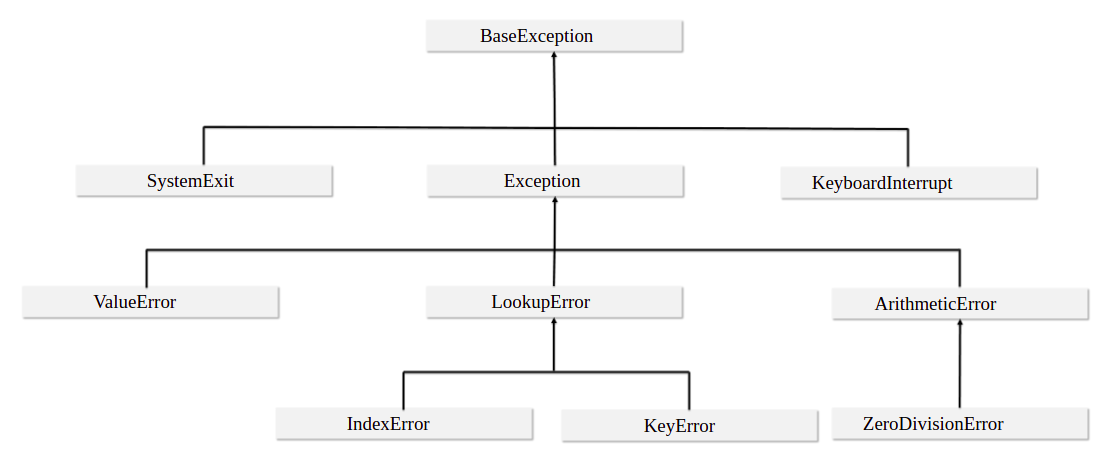

In [15]:
from IPython.display import Image
Image('0_figs/exp.png')

##### raise
- Note: raise is a keyword. The instruction enables you to:
    - simulate raising actual exceptions (e.g., to test your handling strategy)
    - partially handle an exception and make another part of the code responsible for completing the handling (separation of concerns).
 

In [18]:
def badfun(n):
    raise ZeroDivisionError
badfun(0)

ZeroDivisionError: 

In [17]:
def badfun(n):
    raise ZeroDivisionError
    
try:
    badfun(0)
except ArithmeticError:
    print('What did you do?')
print('The End')


What did you do?
The End


In [22]:
def badfun(n):
    try:
        return n/0
    except:
        print('I did it again!')
        raise   
badfun(2)

I did it again!


ZeroDivisionError: division by zero

In [27]:
import sys

def badfun(n):
    try:
        return n/0
    except:
        print('I did it again!')
        print(sys.exc_info())
        #raise      
badfun(2)

I did it again!
(<class 'ZeroDivisionError'>, ZeroDivisionError('division by zero'), <traceback object at 0x7fde85e63370>)


In [20]:
def badfun(n):
    try:
        return n/0
    except:
        print('I did it again!')
        #raise    
try:
    badfun(0)
except ArithmeticError:
    print('I see!')
print('The End')

I did it again!
The End


In [23]:
def badfun(n):
    try:
        return n/0
    except:
        print('I did it again!')
        raise    
try:
    badfun(0)
except ArithmeticError:
    print('I see!')
print('The End')

I did it again!
I see!
The End


##### assert
- Stop the program when some data have improper values
- This is a keyword. How does it work?
    - It evaluates the expression;
    - if the expression evaluates to True, or a non-zero numerical value, or a non-empty string, or any other value different than None, it won’t do anything else;
    - otherwise, it automatically and immediately raises an exception named **AssertionError** (in this case, we say that the assertion has failed)
 

- How it can be used?
    - you may want to put it into your code where you want to be absolutely safe from evidently wrong data, and where you aren’t absolutely sure that the data has been carefully examined before (e.g., inside a function used by someone else)
    - raising an AssertionError exception secures your code from producing invalid results, and clearly shows the nature of the failure;
    - assertions don’t supersede exceptions or validate the data – they are their supplements. 
- If exceptions and data validation are like careful driving, assertion can play the role of an airbag.

In [29]:
import math
x = float(input())
assert x>=0.0
x = math.sqrt(x)
print(x)

9
3.0


In [28]:
import math
x = float(input())
assert x>=0.0
x = math.sqrt(x)
print(x)

-6


AssertionError: 

In [30]:
import math
x = float(input())
try:
    assert x>=0.0
except:
    print('AssertionError!')
else:
    x = math.sqrt(x)
print(x)

-6
AssertionError!
-6.0


<div class="alert alert-block alert-warning">

### 6.6 Characters and strings vs. computers
- Computers store characters as numbers. Every character used by a computer corresponds to a unique number, and vice versa. This assignment must include more characters than you might expect. Many of them are invisible to humans, but essential to computers.

- Some of these characters are called whitespaces, while others are named control characters, because their purpose is to control input/output devices. An example of a whitespace that is completely invisible to the naked eye is a special code, or a pair of codes (different operating systems may treat this issue differently), which are used to mark the ends of the lines inside text files.

- People do not see this sign (or these signs), but are able to observe the effect of their application where the lines are broken.

- We can create virtually any number of character–number assignments, but life in a world in which every type of computer uses a different character encoding would not be very convenient. This system has led to a need to introduce a universal and widely accepted standard implemented by (almost) all computers and operating systems all over the world.

- The one named ASCII (short for American Standard Code for Information Interchange) is the most widely used, and you can assume that nearly all modern devices (like computers, printers, mobile phones, tablets, etc.) use that code.

- The code provides space for 256 different characters, but we are interested only in the first 128. If you want to see how the code is constructed, look at the table here. Look at it carefully – there are some interesting facts. Look at the code of the most common character – the space. This is 32.

- Now check the code of the lower-case letter a. This is 97. And now find the upper-case A. Its code is 65. Now work out the difference between the code of a and A. It is equal to 32. That’s the code of a space. Interesting, isn’t it?

- Also note that the letters are arranged in the same order as in the Latin alphabe

In [37]:
len(c4)

32

In [44]:
c1 = [chr(i) for i in range(128)]
c11 = [i for i in range(128)]

dct1 ={'Character':c1,'Code':c11}

import pandas as pd
dfch = pd.DataFrame(dct1)
dfch.iloc[0:32]

,Character,Code
0, ,0
1,,1
2,,2
3,,3
4,,4
5,,5
6,,6
7,,7
8,,8
9,\t,9


- Of course, the Latin alphabet is not sufficient for the whole of mankind. Users of that alphabet are in the minority.  It was necessary to come up with something more flexible and capacious than ASCII, something able to make all the software in the world amenable to internationalization, because different languages use completely different alphabets, and sometimes these alphabets are not as simple as the Latin one.

         The word “internationalization” is commonly shortened to I18N →

- Why? Look carefully – there is an I at the front of the word, next there are 18 different letters, and an N at the end. Despite the slightly humorous origin, the term is officially used in many documents and standards.

- The software I18N is a standard in present times. Each program has to be written in a way that enables it to be used all around the world, among different cultures, languages and alphabets.

- A classic form of ASCII code uses eight bits for each sign. Eight bits mean 256 different characters. The first 128 are used for the standard Latin alphabet (both upper-case and lower-case characters). Is it possible to push all the other national characters used around the world into the remaining 128 locations?
    - No. It isn’t.
    
- A code point is a number which makes a character. For example, 32 is a code point which makes a space in ASCII encoding. We can say that standard ASCII code consists of 128 code points.

            code point = a number which makes a character

- As standard ASCII occupies 128 out of 256 possible code points, you can only make use of the remaining 128. It’s not enough for all possible languages, but it may be sufficient for one language, or for a small group of similar languages. Can you set the higher half of the code points differently for different languages? Yes, you can. Such a concept is called a code page →
    - A code page is a standard for using the upper 128 code points to store specific national characters. For example, there are different code pages for Western Europe and Eastern Europe, Cyrillic and Greek alphabets, Arabic and Hebrew languages, and so on.
    - This means that the one and same code point can make different characters when used in different code pages.
    - For example, the code point 200 makes Č (a letter used by some Slavic languages) when utilized by the ISO/IEC 8859-2 code page, and makes Ш (a Cyrillic letter) when used by the ISO/IEC 8859-5 code page.

- In consequence, to determine the meaning of a specific code point, you have to know the target code page. In other words, the code points derived from code the page concept are ambiguous.

- Code pages helped the computer industry to solve I18N issues for some time, but it soon turned out that they would not be a permanent solution. The concept that solved the problem in the long term was **Unicode** →
    - Unicode assigns unique (unambiguous) characters (letters, hyphens, ideograms, etc.) to more than a million code points. The first 128 Unicode code points are identical to ASCII, and the first 256 Unicode code points are identical to the ISO/IEC 8859-1 code page (a code page designed for western European languages).

    - The Unicode standard says nothing about how to code and store the characters in the memory and files. It only names all available characters and assigns them to planes (a group of characters of similar origin, application, or nature).


    - There is more than one standard describing the techniques used to implement Unicode in actual computers and computer storage systems. The most general of them is UCS-4 → The name comes from Universal Character Set.

    - UCS-4 uses 32 bits (four bytes) to store each character, and the code is just the Unicode code points’ unique number. A file containing UCS-4 encoded text may start with a BOM (byte order mark), an unprintable combination of bits announcing the nature of the file’s contents. Some utilities may require it.

    - As you can see, UCS-4 is a rather wasteful standard – it increases a text’s size by four times compared to standard ASCII. Fortunately, there are smarter forms of encoding Unicode texts.

- One of the most commonly used is UTF-8 → The name is derived from Unicode Transformation Format. The concept is very smart. UTF-8 uses as many bits for each of the code points as it really needs to represent them.

    - For example: all Latin characters (and all standard ASCII characters) occupy eight bits;  non-Latin characters occupy 16 bits; CJK (China-Japan-Korea) ideographs occupy 24 bits.
     - Due to features of the method used by UTF-8 to store the code points, there is no need to use the BOM, but some of the tools look for it when reading the file, and many editors set it up during the save.
    - Python 3 fully supports Unicode and UTF-8: you can use Unicode/UTF-8 encoded characters to name variables and other entities;
    - you can use them during all input and output. This means that Python3 is completely I18Ned. 

##### Strings
- Strings are sequences
- A string is iterable: Iterating through the strings works
- Strings are immutable. This is a very important feature. Elements can't be changed or deleted via indexing
- As with the absence of the append() method, insert() is illegal, too
- Any string can be empty. Its length is 0 then – just like here →

In [45]:
empty =''
len(empty)

0

- Don’t forget that a backslash (\) used as an escape character is not included in the string’s total length.

In [47]:
empty ='I\'m'
len(empty)

3

In [48]:
list(empty)

['I', "'", 'm']

In general, strings can be:
- concatenated (joined) using +
- replicated using *

In [49]:
"alem"+"fitwi"

'alemfitwi'

In [50]:
"alem"*5

'alemalemalemalemalem'

In [53]:
# Code point value using ord
ord('r')

114

In [54]:
#  corresponding character of a code point value
chr(35)

'#'

In [57]:
chr(945)

'α'

In [58]:
# Stepping over
a = 'alem'
a[::3]

'am'

The function finds the minimum element of the sequence passed as an argument. There is one condition – the sequence (string, list, it doesn’t matter) cannot be empty, or else you’ll get a ValueError exception.

In [60]:
min('aABCDEFGz') # based on the ASCII code point values

'A'

In [61]:
max('aABCDEFGz') # based on the ASCII code point values

'z'

In [62]:
# Capitalize
print('ALEM'.capitalize())

Alem


In [65]:
# find()
txt = """The function finds the minimum element of the 
sequence passed as an argument. There is one condition – 
the sequence (string, list, it doesn’t matter) cannot 
be empty, or else you’ll get a ValueError exception."""

fnd = txt.find('the')
while fnd!=-1:
    print(fnd)
    print(txt[fnd:fnd+len('the')])
    fnd = txt.find('the', fnd+1)

19
the
42
the
105
the


- The upper() method makes a copy of the source string, replaces all lower-case letters with their upper-case counterparts, and returns the string as the result.

In [66]:
'SiGMa=60'.upper()

'SIGMA=60'

- The strip() method combines the effects caused by rstrip() and lstrip() – it makes a new string lacking all the leading and trailing whitespaces.

##### Comparing strings
- It just compares code point values, character by character.
- The final relation between strings is determined by comparing the first different character in both strings (keep ASCII/UNICODE code points in mind at all times)
- String comparison is always case-sensitive (upper-case letters are taken as lesser than lower-case).
- Even if a string contains digits only, it’s still not a number. It’s interpreted as-is, like any other regular string, and its (potential) numerical aspect is not taken into consideration in any way.
- Comparing strings against numbers is generally a bad idea.

##### Two ways of sorting a list
- sorted(list): new list, filled with the sorted argument’s elements
- list.sort():  no new list is created.

In [71]:
lst1 = [8,1,2,3,4]
print(sorted(lst1))
lst = [8,1,2,3,4]
lst.sort() # inplace
print(lst)

[1, 2, 3, 4, 8]
[1, 2, 3, 4, 8]


<div class="alert alert-block alert-warning">

### 6.7 10 File System Methods
- OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules. This module provides a portable way of using operating system dependent functionality.

In [18]:
import os

##### Get Info
- **os.getcwd()** — get the current working directory path as a string — **pwd**    
- **os.listdir()** — get the contents of the current working directory as a list of strings — **ls**    
- **os.walk("starting_directory_path")**— returns a generator with name and path info for directories and files in the the current directory and all subdirectories— no exact short CLI equivalent, but **ls -R** provides subdirectory names and the names of files within subdirectories    

##### Change Things
- **os.chdir("/absolute/or/relative/path")** — change the current working directory — **cd**
- **os.path.join()**—create a path for later use — no short CLI equivalent
- **os.makedirs("dir1/dir2")** — make directory —**mkdir -p**
- **shutil.copy2("source_file_path", "destination_directory_path")** — copy a file or directory — **cp**
- **shutil.move("source_file_path", "destination_directory_path")** — move a file or directory — **mv**
- **os.remove("my_file_path")** — remove a file — rm
- **shutil.rmtree("my_directory_path")**— remove a directory and all files and directories in it —**rm -rf**

##### 1. os.getcwd()
- returns the current working directory as a string. That one is straightforward.

In [1]:
import os
os.getcwd()

'/home/alem/Desktop/FinalNotes/1_Python'

##### 2. os.listdir()
- returns the contents of the current working directory as a list of strings. That one is also straightforward.

In [2]:
import os
os.listdir()

['packages',
 '14_Statistics.ipynb',
 'py2',
 '10. Advanced Python Features.ipynb',
 '__pycache__',
 'py4DS_1',
 '19_TenInterviewQuestions.ipynb',
 '7_OOP.ipynb',
 '18_ParallelProgramming.ipynb',
 '1_Complete-Python-3-Bootcamp-master',
 'sample.xlsx',
 '1_Introduction.ipynb',
 '15_Plotting(Matplot_Seaborn_pandas_plot).ipynb',
 '0_PCAP',
 '8_ModulesAndPackages.ipynb',
 '3_Operators&BuiltinFunctions.ipynb',
 '11_AbstractStaticInterfaceClasses.ipynb',
 '0_Datasets',
 'main.py',
 'Top 100 Python Interview Questions & Answers For 2020 _ Edureka.pdf',
 '0_project',
 '4_pyNotes',
 '6_FileSystems&Exceptions.ipynb',
 '2_ObjectsAndDataStructures.ipynb',
 '5_FunctionsandMethods.ipynb',
 '12_NumpyandArrays.ipynb',
 '.ipynb_checkpoints',
 '4_FlowControls.ipynb',
 '16_PythonDateandTime.ipynb',
 'config.py',
 'result.csv',
 '9_Databases.ipynb',
 'pynotes',
 'modules',
 '17_Algorithms.ipynb',
 '13_Pandas.ipynb',
 '18_DashandPlotly.ipynb',
 '2_Introduction.ipynb',
 '0_figs']

##### 3. os.walk("starting_directory_path")
- - How to traverse file system in Python ? Suppose we have given below file structure in our system and we want to traverse all it’s branches completely from top to bottom ?
- creates a generator that can return information about the current directory and subdirectories. It works through the directories in the specified starting directory.
-  returns the following items for each directory it traverses:
      - current directory path as a string
      - subdirectory names in the current directory as lists of strings
      - filenames in current directory as a list of strings
- It does this for each directory!
- It’s often useful to use os.walk() with a for loop to iterate over the contents of a directory and its subdirectories. For example, the following code will print all files in the directories and subdirectories of the current working directory.

In [9]:
import os
cwd = os.getcwd()
files = []
for dir_path, dir_names, file_names in os.walk(cwd):
    for f in file_names:
        files.append(f)
files[0]

'14_Statistics.ipynb'

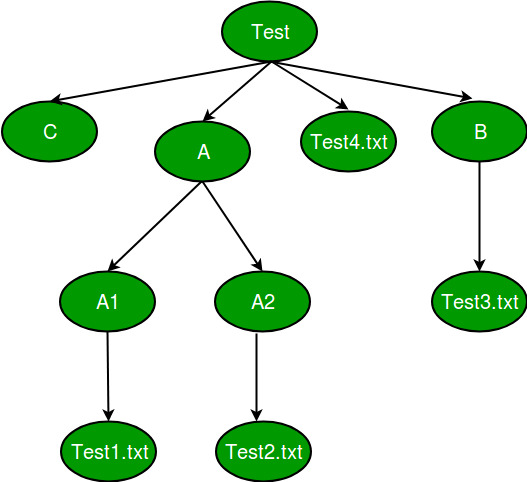

In [8]:
from IPython.display import Image
Image('./0_figs/osWalk.jpg')

How does os.walk() work in python ?
- OS.walk() generate the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).
    - root : Prints out directories only from what you specified.
    - dirs : Prints out sub-directories from root.
    - files : Prints out all files from root and directories.

In [10]:
# Driver function 
import os 
root1,dirs1,files1 =[],[],[]
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk('/home/alem/Desktop/FinalNotes/', topdown=True): 
        root1.append(root)
        dirs1.append(dirs)
        files1.append(files)

In [11]:
root1[0:3]

['/home/alem/Desktop/FinalNotes/',
 '/home/alem/Desktop/FinalNotes/6_FullStackWebDevt',
 '/home/alem/Desktop/FinalNotes/6_FullStackWebDevt/.ipynb_checkpoints']

In [12]:
import os
import sys

def count_py_files_in_repos(dirname):
    if os.path.exists(dirname):
        count = 0
        for root, dirs, files in os.walk(dirname):
            count+=len([f for f in files if f.endswith('.py')])
        print('{} has {} Python files'.format(dirname,count))
    for name in os.listdir(dirname):
        path = os.path.join(dirname, name)
        if os.path.isdir(path):
            count_py_files_in_repos(path)

In [13]:
dirname = '/home/alem/Desktop/FinalNotes/'
#count_py_files_in_repos(dirname)

##### 4. os.chdir("/absolute/or/relative/path")

- This method changes the current working directory to either the absolute or relative path provided.
- If your code then makes other changes to the file system, it’s a good idea to handle any exceptions raised when using this method with ***try-except***. Otherwise you might be deleting directories or files you don’t want deleted.

##### 5. os.path.join()
- The os.path module has a number of useful methods for common pathname manipulations. You can use it to find information about directory names and parts of directory names. The module also has methods to check whether a file or directory exists.
os.path.join() is designed to create a path that will work on most any operating system by joining multiple strings into one beautiful file path.😄
- Here’s the description from the docs:
    - Join one or more path components intelligently. The return value is the concatenation of path and any members of *paths with exactly one directory separator (os.sep) following each non-empty part except the last…
- Basically, if you are on a Unix or macOS system, os.path.join() sticks a forward slash (“/”) between each string you provide to create a path. If the operating system needs a “\” instead, then join knows to use a back slash.
- os.path.join() also provides clear information to other developers that you are creating a path. Definitely use it instead of manual string concatenation to avoid looking like a rookie.

In [16]:
path2 = os.path.join('./tesmakedir', "file.txt")
path2

'./tesmakedir/file.txt'

##### 6. os.makedirs("dir1/dir2")
- os.makedirs() makes directories. The mkdir() method also makes directories, but it does not make intermediate directories. So I suggest you use os.makedirs().

In [4]:
import os
os.makedirs("tesmakedir")

##### 7. shutil.copy2("source_file", "destination")
- There are many ways to copy files and directories in Python. shutil.copy2() is a good choice because it tries to preserve as much of the source file’s metadata as possible. For more discussion, see this article.

In [9]:
import shutil
shutil.copy2("./packages/extra/iota.py", "./tesmakedir/")

'./tesmakedir/iota.py'

In [10]:
shutil.copy("./packages/extra/good/alpha.py", "./tesmakedir/") 

'./tesmakedir/alpha.py'

##### 8. shutil.move("source_file", "destination")
- Use shutil.move() to change a file’s location. It uses copy2 as the default under the hood.

In [13]:
os.makedirs("tesmakedir2")
shutil.move("./tesmakedir/alpha.py", "./tesmakedir2/") 

'./tesmakedir2/alpha.py'

##### 9. os.remove("my_file_path")
- Sometimes you need to remove a file. os.remove() is your tool.

In [14]:
os.remove("./tesmakedir2/alpha.py") 

##### 10. shutil.rmtree("my_directory_path")
shutil.rmtree() removes a directory and all files and directories in it.

In [15]:
shutil.rmtree("./tesmakedir/") 

##### 11. os.stat(source).st_mode 
- performs stat() system call on the specified path. This method is used to get status of the specified path.

        Syntax: os.stat(path)

        Parameter:
            path: A string or bytes object representing a valid path

            Return Type: This method returns a ‘stat_result’ object of class ‘os.stat_result’ which represents the status of specified path. The returned ‘stat-result’ object has following attributes:
            
- Print file permission of the source

        st_mode: It represents file type and file mode bits (permissions).
        st_ino: It represents the inode number on Unix and the file index on Windows platform.
        st_dev: It represents the identifier of the device on which this file resides.
        st_nlink: It represents the number of hard links.
        st_uid: It represents the user identifier of the file owner.
        st_gid: It represents the group identifier of the file owner.
        st_size: It represents the size of the file in bytes.
        st_atime: It represents the time of most recent access. It is expressed in seconds.
        st_mtime: It represents the time of most recent content modification. It is expressed in seconds.
        st_ctime: It represents the time of most recent metadata change on Unix and creation time on Windows. It is expressed in seconds.
        st_atime_ns: It is same as st_atime but the time is expressed in nanoseconds as an integer.
        st_mtime_ns: It is same as st_mtime but the time is expressed in nanoseconds as an integer.
        st_ctime_ns: It is same as st_ctime but the time is expressed in nanoseconds as an integer.
        st_blocks: It represents the number of 512-byte blocks allocated for file.
        st_rdev: It represents the type of device, if an inode device.
        st_flags: It represents the user defined flags for file.
- Note: Some attributes are platform dependent and are subject to availability.

##### File permission and access modes in Unix. 
- File ownership is an important component of Unix that provides a secure method for storing files. Every file in Unix has the following attributes −
    - Owner permissions − The owner's permissions determine what actions the owner of the file can perform on the file.
    - Group permissions − The group's permissions determine what actions a user, who is a member of the group that a file belongs to, can perform on the file.
    - Other (world) permissions − The permissions for others indicate what action all other users can perform on the file.
- The Permission Indicators: While using ls -l command, it displays various information related to file permission as follows:
    - $ls -l /home/amrood
        - -rwxr-xr--  1 amrood   users 1024  Nov 2 00:10  myfile
        - drwxr-xr--- 1 amrood   users 1024  Nov 2 00:10  mydir

In [6]:
lst1 = [i for i in range(0,8)]
lst2 = ['No permission', 'Execute permission', 'Write permission', 
        'Execute and write permission: 1 (execute) + 2 (write) = 3',
       'Read permission','Read and execute permission: 4 (read) + 1 (execute) = 5',
       'Read and write permission: 4 (read) + 2 (write) = 6',
       'All permissions: 4 (read) + 2 (write) + 1 (execute) = 7']
lst3 = ['---', '--x','-w-','-wx','r--','r-x', 'rw-', 'rwx']
columns = ['Number','Octal Permission Representation','Ref']

dct = {columns[0]:lst1, columns[1]:lst2,columns[2]:lst3}

import pandas as pd
df = pd.DataFrame(dct)
df

,Number,Octal Permission Representation,Ref
0,0,No permission,---
1,1,Execute permission,--x
2,2,Write permission,-w-
3,3,Execute and write permission: 1 (execute) + 2 ...,-wx
4,4,Read permission,r--
5,5,Read and execute permission: 4 (read) + 1 (exe...,r-x
6,6,Read and write permission: 4 (read) + 2 (write...,rw-
7,7,All permissions: 4 (read) + 2 (write) + 1 (exe...,rwx


- ls
- ls -a
- ls -la

drwxr-xr-x  3 alem alem      4096 Mar  9  2020 .anaconda
- Dir flag, permission, number of files (if it starts with dir flag), user owner, group owner, PID, date, time, directory_name/filename
  - r: read access for file or listing access for dir
  - w: write access for file, add/deleting for files or directory in dir
  - x:execute access for file, and traversing for a dir, as part of filename

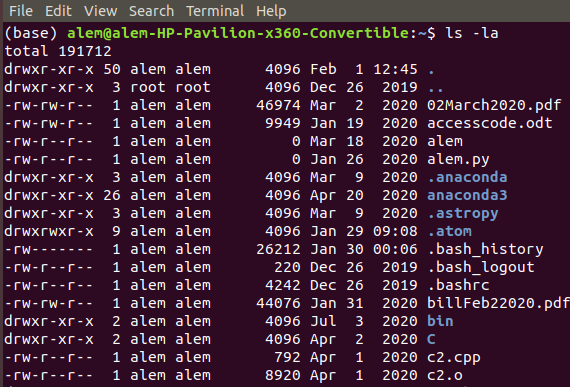

In [7]:
from IPython.display import Image
Image('./0_figs/rwx.png')

        Chmod <perm> file: a command to change a file's permissions
        chmod 754 alem.py: -rwxr-xr-- → 11110110 → 9 bits, 3 for each
        chmod u+x alem.py:adds execution onto file owner
        chmod g-w alem.py: removes write permissions from group
        chmod o+r alem.py: adds read permission to other users
        chmod a-wx alem.py: removes w & x permissions from all users
        chown <un>:<gn> alem.py:  changes owner of a file or dir
        chown alema alem.py: changes alem.py owner to alema
        chown :g1 alem.py: changes alem.py owner to g1

In [2]:
import os
src = os.getcwd()
os.stat(src).st_mode 

16877

In [3]:
os.stat(src).st_ino

4874275

<div class="alert alert-block alert-warning">

### 6.8 Summary

BaseException

+---Exception

|   +---TypeError

|   +---StopIteration

|   +---MemoryError

|   +---NameError

|   |   +---UnboundLocalError

|   +---ValueError

|   |   +---UnicodeError

|   |   |   +---UnicodeEncodeError

|   |   |   +---UnicodeDecodeError

|   |   |   +---UnicodeTranslateError

|   |   +---UnsupportedOperation

|   +---Warning

|   |   +---UserWarning

|   |   +---DeprecationWarning

|   |   +---UnicodeWarning

|   |   +---BytesWarning

|   |   +---SyntaxWarning

|   |   +---ResourceWarning

|   |   +---RuntimeWarning

|   |   +---FutureWarning

|   |   +---ImportWarning

|   |   +---PendingDeprecationWarning

|   +---AttributeError

|   +---EOFError

|   +---LookupError

|   |   +---IndexError

|   |   +---KeyError

|   |   +---CodecRegistryError

|   +---ReferenceError

|   +---ArithmeticError

|   |   +---FloatingPointError

|   |   +---OverflowError

|   |   +---ZeroDivisionError

|   +---Error

|   +---ImportError

|   |   +---ZipImportError

|   +---BufferError

|   +---SyntaxError

|   |   +---IndentationError

|   |   |   +---TabError

|   +---OSError

|   |   +---ConnectionError

|   |   |   +---BrokenPipeError

|   |   |   +---ConnectionAbortedError

|   |   |   +---ConnectionRefusedError

|   |   |   +---ConnectionResetError

|   |   +---BlockingIOError

|   |   +---ProcessLookupError

|   |   +---FileNotFoundError

|   |   +---ItimerError

|   |   +---NotADirectoryError

|   |   +---UnsupportedOperation

|   |   +---PermissionError

|   |   +---FileExistsError

|   |   +---ChildProcessError

|   |   +---TimeoutError

|   |   +---IsADirectoryError

|   |   +---InterruptedError

|   +---SystemError

|   |   +---CodecRegistryError

|   +---AssertionError

|   +---RuntimeError

|   |   +---NotImplementedError

|   |   +---_DeadlockError

+---GeneratorExit

+---SystemExit

+---KeyboardInterrupt

- a user-defined exception maybe drived from the exception class.
- The two basic, mutaully exclusive, file open modes are named:
    - binary and text
- A method able to read data from a file into a byte array object, is named **readinto()**.

<div class="alert alert-block alert-warning">

                               ~END~